<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/03_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Classification with Tensorflow

### Creating Data to view and fit

In [1]:
from sklearn.datasets import make_circles

#make 10000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Visualize the data

In [4]:
import pandas as pd

circles = pd.DataFrame({"x0":X[:,0], "X1":X[:,1], "label":y})
circles

,x0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


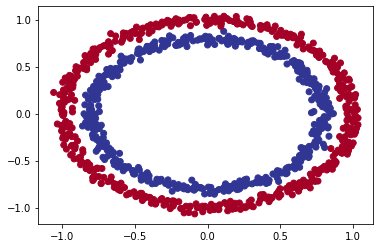

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

### input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y), X[0], y[0]

(1000, 1000, array([0.75424625, 0.23148074]), 1)

### Steps in Modelling in Tensorflow

In [7]:
import tensorflow as tf

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2.Complie the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history = model_1.fit(X, y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [15]:
# increase the epocs
history = model_1.fit(X, y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 915us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [17]:
# Model 2

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2.Complie the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history = model_2.fit(X, y,epochs=100, verbose=0)

In [18]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 971us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

### improving the classification model

In [20]:
# Model 3

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2.Complie the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_3.fit(X, y,epochs=100, verbose=0)

In [21]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 965us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

### Plotting Decision boundaries

In [23]:
import numpy as np

In [40]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  x_min, x_max = X[:,0].min()- 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()- 0.1, X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
 # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

 # make prediction
  y_pred = model.predict(x_in)

 #check for multiclass
  if len(y_pred[0]) > 1:
      print("Doing multiclass classification")
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.reshape)
  else:
      print("binary classification")
      y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundaries
  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



binary classification


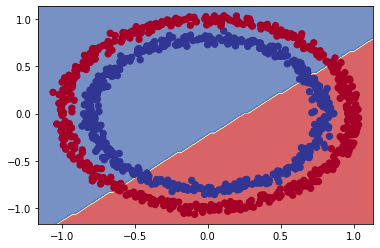

In [41]:
# check the prediction is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [45]:
# check the model for a regression problem
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100,5)

# Split data
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Model 4

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2.Complie the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])


# Fit the model
model_4.fit(X_reg_train, y_reg_train,epochs=100, verbose=0)

In [46]:
model_4.evaluate(X_reg_test,y_reg_test)

2/2 [==============================] - 0s 6ms/step - loss: 57.8927 - mae: 57.8927


[57.892669677734375, 57.89266586303711]

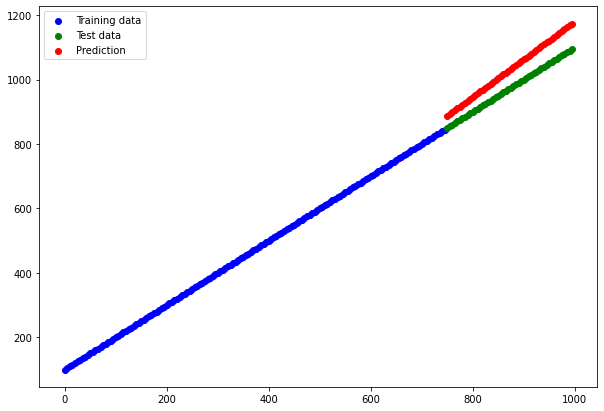

In [48]:
y_reg_pred = model_4.predict(X_reg_test)

# plot the result
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Prediction")
plt.legend();

###Non linearity

In [52]:
# Model 5

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1)
])

# 2.Complie the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y,epochs=2000, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [53]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 976us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

binary classification


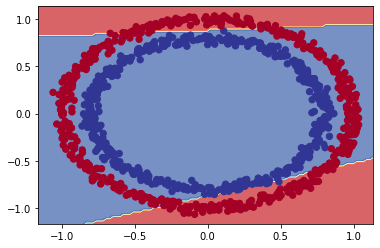

In [55]:
# visualize
plot_decision_boundary(model_5, X,y)

In [56]:
# Model 6

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2.Complie the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y,epochs=2000, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 0s 999us/step - loss: 0.0099 - accuracy: 0.9950
binary classification


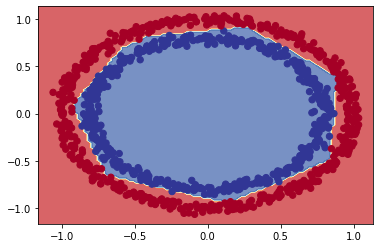

In [57]:
model_6.evaluate(X,y)

# visualize

plot_decision_boundary(model_6, X,y)

In [58]:
# Model 7

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
])

# 2.Complie the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y,epochs=2000, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.5000
binary classification


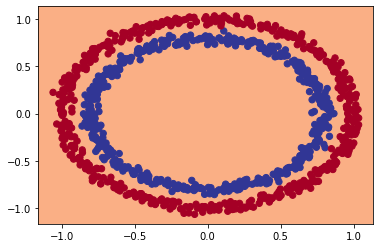

In [61]:
model_7.evaluate(X,y)

# visualize

plot_decision_boundary(model_7, X,y)

In [63]:
# Model 8

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
])

# 2.Complie the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_8.fit(X, y,epochs=2000, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
binary classification


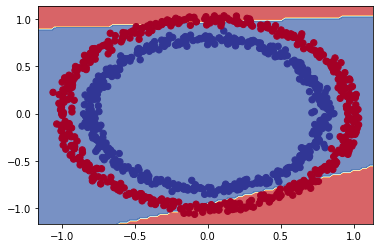

In [64]:
model_8.evaluate(X,y)

# visualize

plot_decision_boundary(model_8, X,y)

### Replicating Non linear activation function

In [67]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

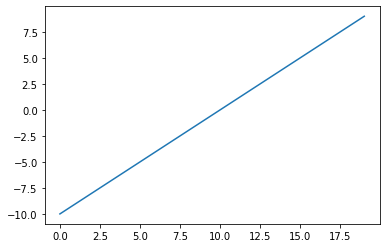

In [68]:
plt.plot(A)

In [69]:
# replicating sigmoid function
def sigmoid(x):
  return 1/(1+tf.exp(-x))


In [70]:
#use sigmoid on A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

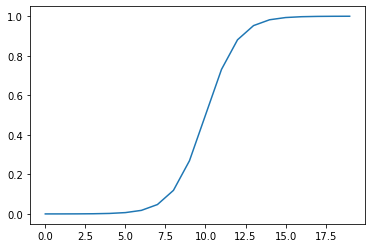

In [71]:
plt.plot(sigmoid(A))

In [72]:
# replicating ReLu function

def relu(x):
  return tf.maximum(0,x)

In [74]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

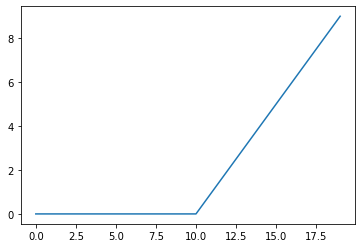

In [75]:
plt.plot(relu(A))

### Evaluating and improving the classification model

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [93]:
# create the model to fit the data

# Model 9

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2.Complie the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

history = model_9.fit(X_train, y_train,epochs=500, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [94]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9850


[0.03046332113444805, 0.9850000143051147]

binary classification
binary classification


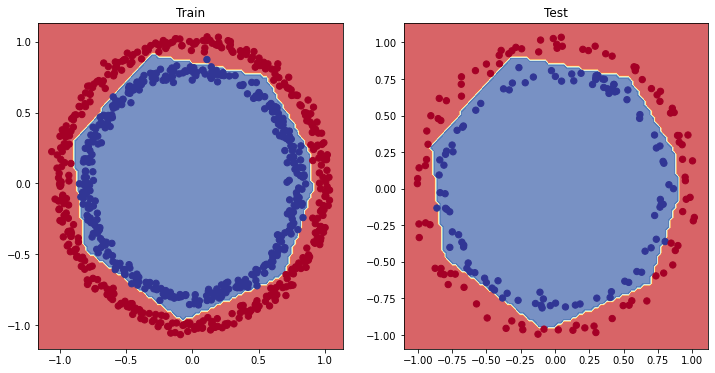

In [95]:
# plot the decision doundary

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9,X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9,X=X_test, y=y_test)
plt.show()

### plotting the loss curve

In [97]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
...,...,...
495,0.022860,0.99125
496,0.021308,0.99125
497,0.022150,0.99000
498,0.033319,0.98625


Text(0.5, 1.0, 'Model_9 loss curve')

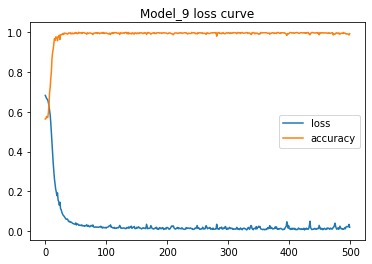

In [99]:
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curve")

### Finding the best learning rate using callbacks

In [101]:
# Model 10

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2.Complie the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

history_10 = model_10.fit(X_train, y_train,epochs=100, verbose=0, callbacks=[lr_scheduler])

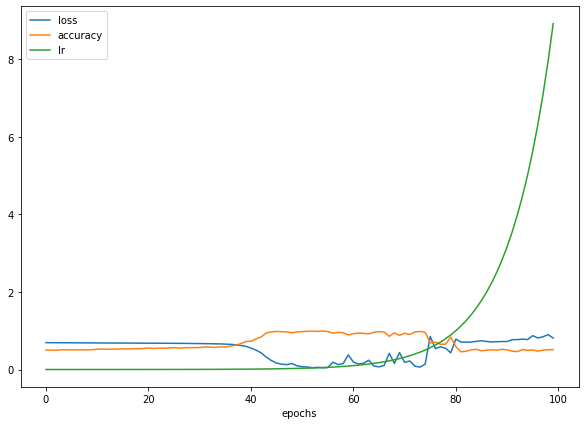

In [102]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

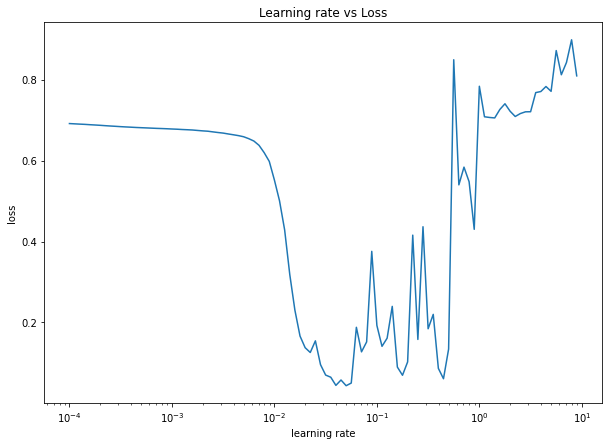

In [104]:
# plot the learning rate vs loss

lrs = 1e-4 *  (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs Loss")

In [112]:
# Model 11

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2.Complie the model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

history_11 = model_11.fit(X_train, y_train,epochs=500, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [113]:
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9950


[0.020174365490674973, 0.9950000047683716]

In [114]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9850


[0.03046332113444805, 0.9850000143051147]

binary classification
binary classification


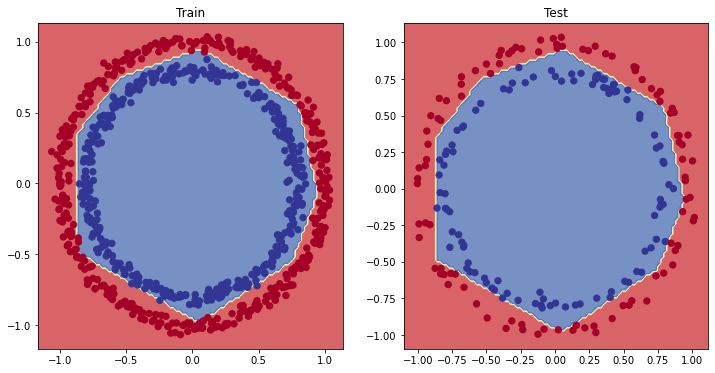

In [115]:
# plot the decision doundary

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11,X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11,X=X_test, y=y_test)
plt.show()